<a href="https://colab.research.google.com/github/DesiPilla/MLTSA_DPilla/blob/master/HW1/HW1ExtraCredit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MLTSA UDel PHYS667 Sprint 2020

HW1 Extra Credit :

Solve Exercise 1, 2, 3 from https://arxiv.org/pdf/1008.4686.pdf

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
data = [[201, 592, 61, 9, -0.84],
        [244, 401, 25, 4, 0.31],
        [47, 583, 38, 11, 0.64],
        [287, 402, 15, 7, -0.27],
        [203, 495, 21, 5, -0.33],
        [58, 173, 15, 9, 0.67],
        [210, 479, 27, 4, -0.02],
        [202, 504, 14, 4, -0.05],
        [198, 510, 30, 11, -0.84],
        [158, 416, 16, 7, -0.69],
        [165, 393, 14, 5, 0.30],
        [201, 442, 25, 5, -0.46],
        [157, 317, 52, 5, -0.03],
        [131, 311, 16, 6, 0.50],
        [166, 400, 34, 6, 0.73],
        [160, 337, 31, 5, -0.52],
        [186, 423, 42, 9, 0.90],
        [125, 334, 26, 8, 0.40],
        [218, 533, 16, 6, -0.78],
        [146, 344, 22, 5, -0.56]]

data = pd.DataFrame(data, columns = ["x", "y", "sy", "sx", "rho"])
data.index += 1
data

,x,y,sy,sx,rho
1,201,592,61,9,-0.84
2,244,401,25,4,0.31
3,47,583,38,11,0.64
4,287,402,15,7,-0.27
5,203,495,21,5,-0.33
6,58,173,15,9,0.67
7,210,479,27,4,-0.02
8,202,504,14,4,-0.05
9,198,510,30,11,-0.84
10,158,416,16,7,-0.69


# Exercise 1

In [33]:
x = data.loc[5:,"x"].values             # Get X values
X = np.c_[np.ones((len(x), 1)), x]      # Add column of 1's
sy = data.loc[5:, "sy"].values          # Get uncertainty values
C = np.identity(len(x)) * sy            # Create uncertainty matrix
Cinv = np.linalg.inv(C)                 # Take inverse of C
Y = data.loc[5:,"y"].values             # Get Y values
params = np.linalg.inv(X.T.dot(Cinv).dot(X)).dot(X.T).dot(Cinv).dot(Y)      # Solve normal equations

print ("best fit parameters from the Normal Equation: " + 
       "intercept {:.2f}, slope {:.2f}".format(*params))

best fit parameters from the Normal Equation: intercept 33.45, slope 2.22


In [0]:
def line(x, params):
    return params[1] * x + params[0]

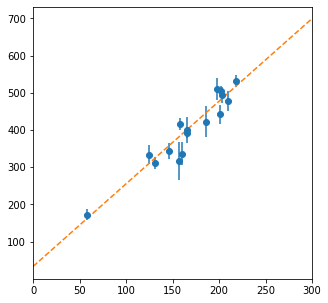

In [35]:
plt.figure(figsize = (5, 5));
plt.errorbar(x, Y, sy, 0, fmt = 'o');
plt.plot(range(300), line(range(300), params), '--');
plt.xlim(0, 300);

**Figure 1:** This plot shows data points 5 through 20 (and their uncertainties) as well as a linear regression fit through the points.

In [36]:
suv = ((x - x.mean())**2).sum() / np.var(Y)
print("The standard uncertainty variance on the slope of the" + \
      " line is {0:.2f}".format(suv))

The standard uncertainty variance on the slope of the line is 2.94


# Exercise 2

In [37]:
x = data.loc[:,"x"].values             # Get X values
X = np.c_[np.ones((len(x), 1)), x]      # Add column of 1's
sy = data.loc[:, "sy"].values          # Get uncertainty values
C = np.identity(len(x)) * sy            # Create uncertainty matrix
Cinv = np.linalg.inv(C)                 # Take inverse of C
Y = data.loc[:,"y"].values             # Get Y values
params = np.linalg.inv(X.T.dot(Cinv).dot(X)).dot(X.T).dot(Cinv).dot(Y)      # Solve normal equations

print ("best fit parameters from the Normal Equation: " + 
       "intercept {:.2f}, slope {:.2f}".format(*params))

best fit parameters from the Normal Equation: intercept 252.47, slope 0.90


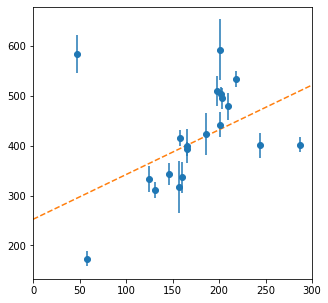

In [38]:
plt.figure(figsize = (5, 5));
plt.errorbar(x, Y, sy, 0, fmt = 'o');
plt.plot(range(300), line(range(300), params), '--');
plt.xlim(0, 300);

**Figure 2:** This plot shows all data points (and their uncertainties) as well as a linear regression fit through the points.

In [39]:
suv = ((x - x.mean())**2).sum() / np.var(Y)
print("The standard uncertainty variance on the slope of the" + \
      " line is {0:.2f}".format(suv))

The standard uncertainty variance on the slope of the line is 6.05


This result is much higher than in exercise 1. This is due to the fact that the new points lie much farther away from the general trend of the previous points.

# Exercise 3

In [53]:
x = data.loc[5:,"x"].values             # Get X values
X = np.c_[np.ones((len(x), 1)), x, x**2]# Add column of 1's
sy = data.loc[5:, "sy"].values          # Get uncertainty values
C = np.identity(len(x)) * sy            # Create uncertainty matrix
Cinv = np.linalg.inv(C)                 # Take inverse of C
Y = data.loc[5:,"y"].values             # Get Y values
params = np.linalg.inv(X.T.dot(Cinv).dot(X)).dot(X.T).dot(Cinv).dot(Y)      # Solve normal equations

print ("best fit parameters from the Normal Equation: " + 
       "intercept: {:.2f}, x: {:.2f}, x^2: {:.4f}".format(*params))

best fit parameters from the Normal Equation: intercept: 81.93, x: 1.45, x^2: 0.0027


In [0]:
def quad(x, params):
    return params[2] * np.square(x) + params[1] * x + params[0]

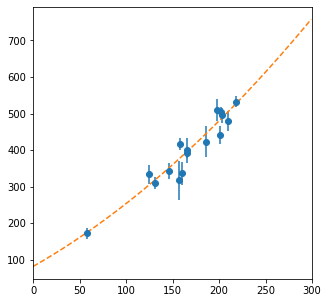

In [59]:
plt.figure(figsize = (5, 5));
plt.errorbar(x, Y, sy, 0, fmt = 'o');
plt.plot(range(300), quad(range(300), params), '--');
plt.xlim(0, 300);

**Figure 3:** This plot shows all data points (and their uncertainties) as well as a regression fit through the points.